<a href="https://www.pieriandata.com"><img src="../DATA/Logo.jpg"></a>
*Copyright Pierian Data Inc.*

# MeanShift Tracking

In [1]:
import numpy as np
import cv2 

# Capture a video stream
cap = cv2.VideoCapture(0)

# take first frame of the video
ret,frame = cap.read()


#### Set Up the Initial Tracking Window ####


# We will first detect the face and set that as our starting box.
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')
face_rects = face_cascade.detectMultiScale(frame) 

# Convert this list of a single array to a tuple of (x,y,w,h)
(face_x,face_y,w,h) = tuple(face_rects[0]) #face_cascade will detect muptiple face ,face_rects[0] to grab only 1st face location
track_window = (face_x,face_y,w,h)
# set up the ROI for tracking
roi = frame[face_y:face_y+h, face_x:face_x+w]


# Use the HSV Color Mapping
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# Find histogram to backproject the target on each frame for calculation of meanshit
roi_hist = cv2.calcHist([hsv_roi],[0],None,[180],[0,180])   #upper limit=[180],range=[0,180] i.e count only 0-180 ranging pixels

# Normalize the histogram array values given a min of 0 and max of 255
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)


# Setup the termination criteria, either 10 iteration or move by at least 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

while True:
    ret ,frame = cap.read()
    if ret == True:
        
        # Grab the Frame in HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # Calculate the Back Projection based off the roi_hist created earlier
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        
        # Apply meanshift to get the new coordinates of the rectangle
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)
        
        # Draw the new rectangle on the image
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255),5)
        
        cv2.imshow('img2',img2)
        
        
        k = cv2.waitKey(1) & 0xff
        if k == 27:
            break
        
    else:
        break
        
cv2.destroyAllWindows()
cap.release()

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [7]:
brick=cv2.imread('DATA/bricks.jpg')
show_brick=cv2.cvtColor(horse,cv2.COLOR_BGR2RGB)

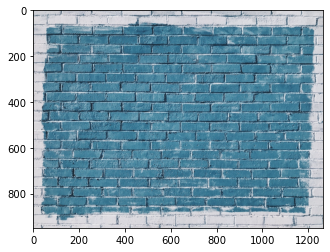

In [8]:
plt.imshow(show_brick)

In [23]:
h=cv2.calcHist([brick],[0],None,[180],[0,180])

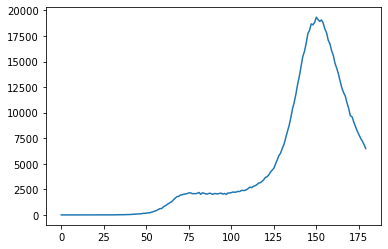

In [25]:
plt.plot(h)

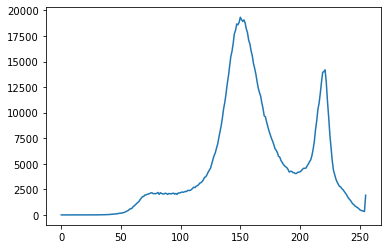

In [34]:
plt.plot(cv2.calcHist([brick],[0],None,[256],[0,256]))

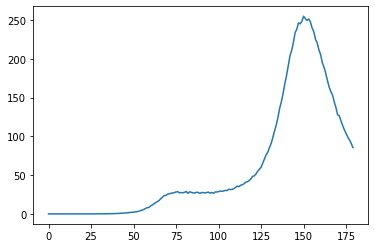

In [36]:
plt.plot(cv2.normalize(h,h,0,255,cv2.NORM_MINMAX))